# Thanks to:
**StatQuest by Josh Starmer**: https://youtube.com/playlist?list=PLblh5JKOoLUL3IJ4-yor0HzkqDQ3JmJkc

## Importing packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Defining constants

In [2]:
TEST_SIZE: float = 0.2  # Train size would be 1 - TEST_SIZE
TEST_CASE: str = 'updated_dating.csv'

## Importing the `csv` as a `pandas` `DataFrame`

In [3]:
df: pd.DataFrame = pd.read_csv(TEST_CASE)
df.drop(df.columns[0], axis=1, inplace=True)  # Dropping the first column (serial number)
df.head()

,gender,age,income,career,dec,attr,sinc,intel,fun,amb,like
0,0,21.0,69487.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,7.0
1,0,21.0,69487.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,7.0
2,0,21.0,69487.0,lawyer,1,5.0,8.0,9.0,8.0,5.0,7.0
3,0,21.0,69487.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,7.0
4,0,21.0,69487.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0


## Preprocessing

- ### Preprocessing `career`

In [4]:
df['career'] = df['career'].fillna('undecided')  # Filling empty cells with 'undecided'
df['career'] = df['career'].str.lower()  # Turining everything lowercase to prepare for encoding
df.head()

,gender,age,income,career,dec,attr,sinc,intel,fun,amb,like
0,0,21.0,69487.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,7.0
1,0,21.0,69487.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,7.0
2,0,21.0,69487.0,lawyer,1,5.0,8.0,9.0,8.0,5.0,7.0
3,0,21.0,69487.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,7.0
4,0,21.0,69487.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0


**Preprocessing using One Hot Encoder**

In [5]:
encoder = OneHotEncoder()

# Encoding the string column
career_encoded = encoder.fit_transform(df[['career']])

# Convert back to DataFrame
career_encoded_df = pd.DataFrame(career_encoded.toarray(), columns=encoder.get_feature_names_out(['career']))

# Combining with original DataFrame
df = df.reset_index(drop=True) 
df = df.join(career_encoded_df)
df.drop('career', axis=1, inplace=True)  # No more need for the original string column
df

,gender,age,income,dec,attr,sinc,intel,fun,amb,like,...,career_who knows,career_work at the un,career_work in an investment bank,career_writer,career_writer/editor,career_writer/journalist,career_writer/producer,career_writer/teacher,career_writing,career_writing or editorial
0,0,21.0,69487.0,1,6.0,9.0,7.0,7.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,21.0,69487.0,1,7.0,8.0,7.0,8.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,21.0,69487.0,1,5.0,8.0,9.0,8.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,21.0,69487.0,1,7.0,6.0,8.0,7.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,21.0,69487.0,1,5.0,6.0,7.0,7.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,1,25.0,NaN,0,2.0,7.0,6.0,6.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7036,1,25.0,NaN,0,3.0,4.0,6.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7037,1,25.0,NaN,0,3.0,3.0,9.0,6.0,9.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7038,1,25.0,NaN,0,2.0,7.0,9.0,8.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- ### Preprocessing the numeric columns (`age` and `income`)

In [6]:
df.fillna(df.mean(), inplace=True)  # Replacing empty cells with mean instead
df

,gender,age,income,dec,attr,sinc,intel,fun,amb,like,...,career_who knows,career_work at the un,career_work in an investment bank,career_writer,career_writer/editor,career_writer/journalist,career_writer/producer,career_writer/teacher,career_writing,career_writing or editorial
0,0,21.0,69487.000000,1,6.0,9.0,7.0,7.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,21.0,69487.000000,1,7.0,8.0,7.0,8.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,21.0,69487.000000,1,5.0,8.0,9.0,8.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,21.0,69487.000000,1,7.0,6.0,8.0,7.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,21.0,69487.000000,1,5.0,6.0,7.0,7.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,1,25.0,45525.870195,0,2.0,7.0,6.0,6.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7036,1,25.0,45525.870195,0,3.0,4.0,6.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7037,1,25.0,45525.870195,0,3.0,3.0,9.0,6.0,9.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7038,1,25.0,45525.870195,0,2.0,7.0,9.0,8.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- ### Standard Scaling all numeric columns (Mean = 0, Standard Deviation = 1)

In [7]:
scaler = StandardScaler()
# Attractiveness and fun are not scaled because we will need them for plotting
df[['age', 'income', 'sinc', 'intel', 'amb', 'like']] = scaler.fit_transform(df[['age', 'income', 'sinc', 'intel', 'amb', 'like']])
df.head()

,gender,age,income,dec,attr,sinc,intel,fun,amb,like,...,career_who knows,career_work at the un,career_work in an investment bank,career_writer,career_writer/editor,career_writer/journalist,career_writer/producer,career_writer/teacher,career_writing,career_writing or editorial
0,0,-1.517535,1.925448,1,6.0,1.053773,-0.228924,7.0,-0.422915,0.470224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-1.517535,1.925448,1,7.0,0.479759,-0.228924,8.0,-0.979475,0.470224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,-1.517535,1.925448,1,5.0,0.479759,1.053195,8.0,-0.979475,0.470224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,-1.517535,1.925448,1,7.0,-0.668270,0.412136,7.0,-0.422915,0.470224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,-1.517535,1.925448,1,5.0,-0.668270,-0.228924,7.0,-0.422915,-0.070839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting into training and testing data

In [8]:
X = df.drop('dec', axis=1)  # The SVM must not train on the output
y = df['dec']  # We will test the output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=69)

## Verifying training and testing data

In [9]:
X_train.head()

,gender,age,income,attr,sinc,intel,fun,amb,like,career_?,...,career_who knows,career_work at the un,career_work in an investment bank,career_writer,career_writer/editor,career_writer/journalist,career_writer/producer,career_writer/teacher,career_writing,career_writing or editorial
2814,1,1.090394,0.050394,5.0,-1.816299,-0.869983,5.0,-0.422915,-1.152964,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1364,1,-0.358455,0.000000,7.0,1.627788,0.412136,7.0,0.133646,1.011287,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6467,0,0.221084,0.000000,5.0,-0.668270,-1.511042,5.0,-0.979475,0.470224,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3138,0,-0.358455,0.274671,7.0,-0.094256,-0.228924,6.0,-0.422915,0.470224,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3758,0,1.090394,0.000000,5.0,-0.668270,-1.511042,5.0,-0.979475,-1.152964,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X_test.head()

,gender,age,income,attr,sinc,intel,fun,amb,like,career_?,...,career_who knows,career_work at the un,career_work in an investment bank,career_writer,career_writer/editor,career_writer/journalist,career_writer/producer,career_writer/teacher,career_writing,career_writing or editorial
5723,1,0.221084,0.000000,6.0,-0.668270,-0.869983,5.0,0.133646,-0.611901,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5122,1,0.800624,0.000000,6.0,-0.094256,-0.228924,4.0,-0.422915,-1.694027,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3492,1,-0.358455,-0.135150,6.5,0.479759,1.053195,10.0,0.690206,-1.694027,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1590,1,1.669934,1.432376,8.0,-0.094256,-2.152102,6.0,-0.422915,1.011287,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
633,1,0.510854,0.000000,7.0,0.479759,0.412136,7.0,0.690206,0.470224,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training an SVM classifier

In [11]:
svm = SVC(kernel='linear')  # Using a linear kernel because it gives better accuracy
svm.fit(X_train, y_train)

SVC(kernel='linear')

Predict the output of the test data and calculate the accuracy

In [12]:
y_pred = svm.predict(X_test)
accuracy: float = accuracy_score(y_test, y_pred)
accuracy

0.8323863636363636

# Output

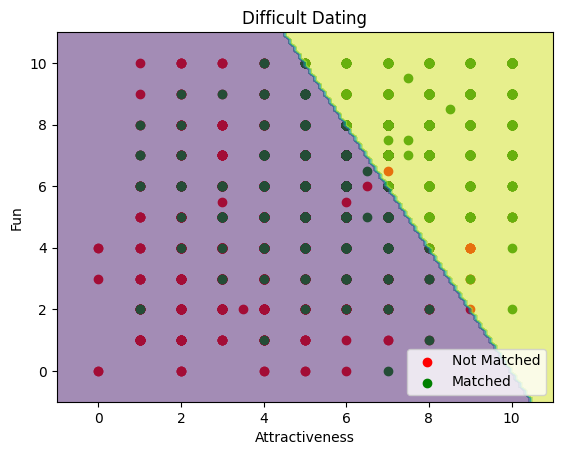

Accuracy Score: 0.8323863636363636


In [13]:
# Setting up the plot
svm.fit(X_train[['attr', 'fun']], y_train)  # Fit the plot based on attractiveness and fun
plt.scatter(X_train[y_train == 0]['attr'],
            X_train[y_train == 0]['fun'], 
            c='r',
            label='Not Matched')

plt.scatter(X_train[y_train == 1]['attr'],
            X_train[y_train == 1]['fun'],
            c='g',
            label='Matched')

# Adding labels and title
plt.xlabel('Attractiveness')
plt.ylabel('Fun')
plt.title('Difficult Dating')
plt.legend()

# Plotting the decision boundary
DecisionBoundaryDisplay.from_estimator(
    svm,
    X_train[['attr', 'fun']],
    response_method='predict',
    alpha=0.5,
    ax=plt.gca()
)
# Final output
plt.show()
print(f'Accuracy Score: {accuracy}')